<a href="https://colab.research.google.com/github/bhumikarvyas/Zomato/blob/master/Zomato_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#2. Get the file
downloaded = drive.CreateFile({'id':"1ZkzKUwL193j3HFuFSH24UiEuA4s9wQv_"})   # replace the id with id of file you want to access
downloaded.GetContentFile('zomato_data.csv')

In [ ]:
downloaded

GoogleDriveFile({'id': '1ZkzKUwL193j3HFuFSH24UiEuA4s9wQv_', 'kind': 'drive#file', 'etag': '"MTU5MjIyNDI3ODAwMA"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1ZkzKUwL193j3HFuFSH24UiEuA4s9wQv_', 'webContentLink': 'https://drive.google.com/uc?id=1ZkzKUwL193j3HFuFSH24UiEuA4s9wQv_&export=download', 'alternateLink': 'https://drive.google.com/file/d/1ZkzKUwL193j3HFuFSH24UiEuA4s9wQv_/view?usp=drivesdk', 'embedLink': 'https://drive.google.com/file/d/1ZkzKUwL193j3HFuFSH24UiEuA4s9wQv_/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/text/csv', 'title': '11-6-Dataset-Ranking of Restaurants.csv', 'mimeType': 'text/csv', 'labels': {'starred': True, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2020-06-28T05:08:16.427Z', 'modifiedDate': '2020-06-15T12:31:18.000Z', 'lastViewedByMeDate': '2020-06-30T14:48:01.605Z', 'markedViewedByMeDate': '1970-01-01T00:00:00.000Z', 'v

In [ ]:
#Read file as panda dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('zomato_data.csv') 

In [ ]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
data.shape

(51717, 17)

# **Preprocessing and visualizing the data**

In [ ]:
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

**The column 'dish_liked' has the most number of null or NaN values, so it is better to be dropped. 
Also, the columns 'url', 'phone' are irrelevent for predicting the rating 
The columns address, listed_in(city) and location give redundant information so we delete columns 'address','listed_in(city)'**

In [ ]:
#Deleting Unnnecessary Columns
zomato=data.drop(['url','dish_liked','phone','address','listed_in(city)'],axis=1) 

In [ ]:
zomato.sample(15)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)
48293,Nossa Goa,Yes,Yes,4.1 /5,302,Richmond Road,Casual Dining,"Goan, Seafood, Konkan, Desserts","1,000","[('Rated 4.0', ""RATED\n As a Goan I'm always ...",[],Dine-out
45542,Cafe Oleiva,No,No,3.4 /5,6,Thippasandra,Cafe,Cafe,500,"[('Rated 5.0', 'RATED\n The food was absolute...",[],Desserts
25076,Hotel Prameela Veg,No,No,NaN,0,Banaswadi,Quick Bites,South Indian,100,[],[],Dine-out
16005,Hatti Punjab Di,No,No,3.3/5,24,HSR,Casual Dining,"North Indian, Chinese",600,"[('Rated 2.0', 'RATED\n Ordered lunch fish Ta...",[],Delivery
15515,Kamat Hotel,No,No,3.6/5,60,Shivajinagar,Casual Dining,"North Indian, South Indian, Chinese",450,"[('Rated 3.0', 'RATED\n Good vegetarian place...",[],Dine-out
31912,Hyder Ali Kitchen,No,No,NaN,0,Bannerghatta Road,Quick Bites,Biryani,300,[],[],Dine-out
17240,Yo! Thali,Yes,No,3.5/5,4,HSR,Quick Bites,"North Indian, South Indian, Chinese",400,"[('Rated 5.0', 'RATED\n Delicious and homely ...","['Dal Makhani with Rice Bowl', 'Rajma Chawal',...",Dine-out
3397,Arya Vysya Refreshment,No,No,-,0,Basavanagudi,Quick Bites,South Indian,100,[],[],Dine-out
19390,Samskruti - Sanman Gardenia,Yes,No,4.0/5,140,Jayanagar,Casual Dining,"North Indian, Chinese, South Indian",550,"[('Rated 4.0', 'RATED\n Enjoyed the buffet sp...",[],Buffet
41666,Mast Biryani - Fresh Indian Kitchen,No,No,3.5 /5,254,Marathahalli,Casual Dining,"Biryani, North Indian, Mughlai, Fast Food",500,"[('Rated 4.0', ""RATED\n Amazing variants in f...",[],Dine-out


# **Removing Duplicate values**

In [ ]:
zomato.duplicated().sum()

9836

**As there is large number of duplicated rows of data present, we drop them**

In [ ]:
zomato = zomato.drop_duplicates()

In [ ]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41881 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         41881 non-null  object
 1   online_order                 41881 non-null  object
 2   book_table                   41881 non-null  object
 3   rate                         37629 non-null  object
 4   votes                        41881 non-null  int64 
 5   location                     41867 non-null  object
 6   rest_type                    41709 non-null  object
 7   cuisines                     41845 non-null  object
 8   approx_cost(for two people)  41628 non-null  object
 9   reviews_list                 41881 non-null  object
 10  menu_item                    41881 non-null  object
 11  listed_in(type)              41881 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.2+ MB


In [ ]:
zomato.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           4252
votes                             0
location                         14
rest_type                       172
cuisines                         36
approx_cost(for two people)     253
reviews_list                      0
menu_item                         0
listed_in(type)                   0
dtype: int64

# **Filling the null values**

In [ ]:
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
zomato['rate'] = zomato['rate'].replace('NEW',np.NaN)
zomato['rate'] = zomato['rate'].replace('-',np.NaN)
zomato['rate'] = zomato['rate'].fillna(zomato['rate'].mode()[0])

In [ ]:
zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
zomato['location'] = zomato['location'].fillna(zomato['location'].mode()[0])
zomato['rest_type'] = zomato['rest_type'].fillna(zomato['rest_type'].mode()[0])
zomato['cuisines'] = zomato['cuisines'].fillna(zomato['cuisines'].mode()[0])
zomato['approx_cost(for two people)'] = zomato['approx_cost(for two people)'].fillna(zomato['approx_cost(for two people)'].mode()[0])

In [ ]:
zomato.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
dtype: int64

In [ ]:
zomato.shape

(41881, 12)

In [ ]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41881 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         41881 non-null  object
 1   online_order                 41881 non-null  object
 2   book_table                   41881 non-null  object
 3   rate                         41881 non-null  object
 4   votes                        41881 non-null  int64 
 5   location                     41881 non-null  object
 6   rest_type                    41881 non-null  object
 7   cuisines                     41881 non-null  object
 8   approx_cost(for two people)  41881 non-null  object
 9   reviews_list                 41881 non-null  object
 10  menu_item                    41881 non-null  object
 11  listed_in(type)              41881 non-null  object
dtypes: int64(1), object(11)
memory usage: 4.2+ MB


# **Transforming categorical data into numerical data**

# **Performimg EDA**

**Online order available or not**

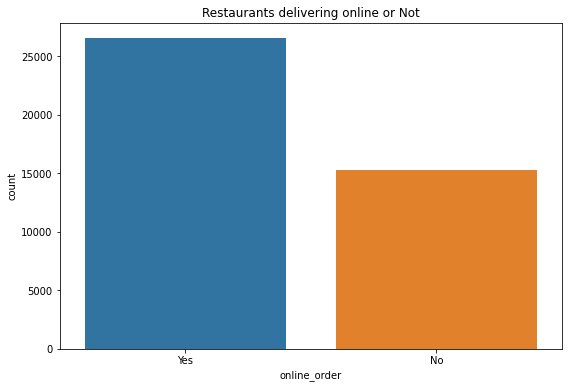

In [ ]:
plt.figure(figsize=(9,6))
plt.title('Restaurants delivering online or Not')
sns.countplot(zomato['online_order'])

***The barplot shows that most of the restaurants have the facility of online orders***



---

**Location**

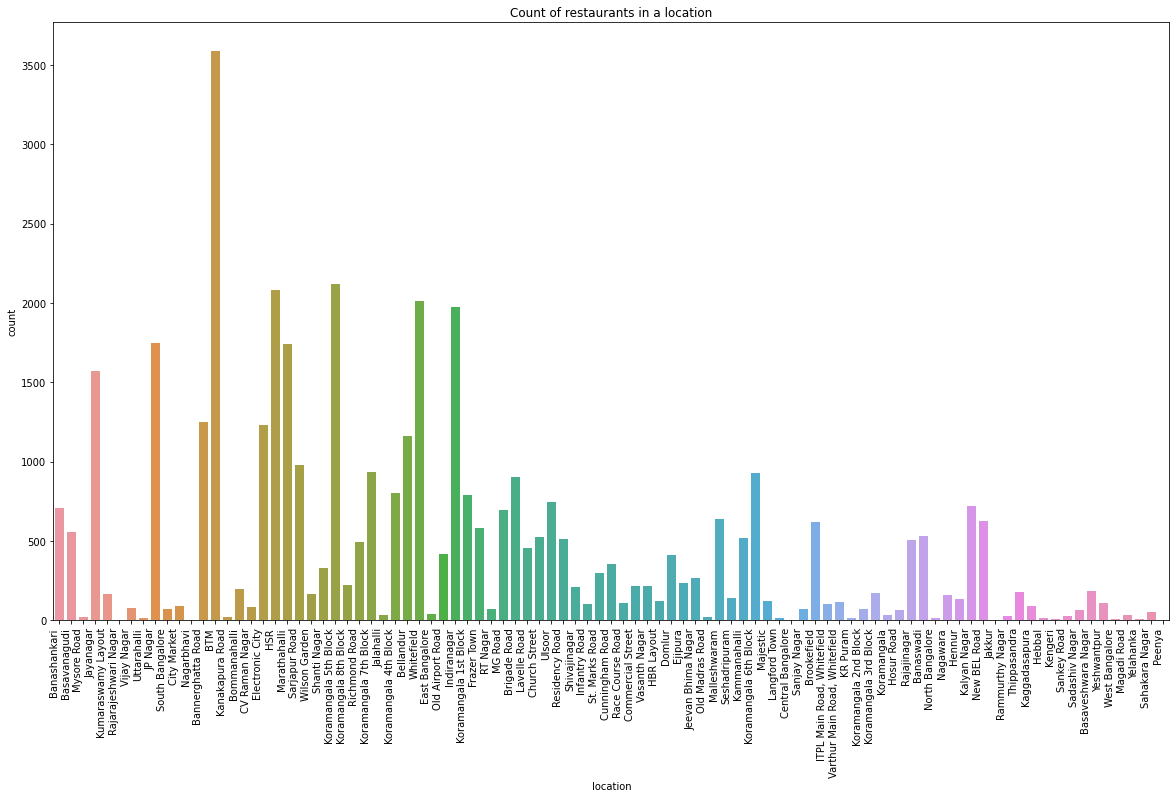

In [ ]:
plt.figure(figsize=(20,11))
plt.title('Count of restaurants in a location')
sns.countplot(zomato['location']).set_xticklabels(sns.countplot(zomato['location']).get_xticklabels(), rotation=90, ha="right")
sns.countplot(zomato['location'])

***We can see from the barplot that BTM location has the largest no of restaurants***



---
**Most frequent of rest_type**

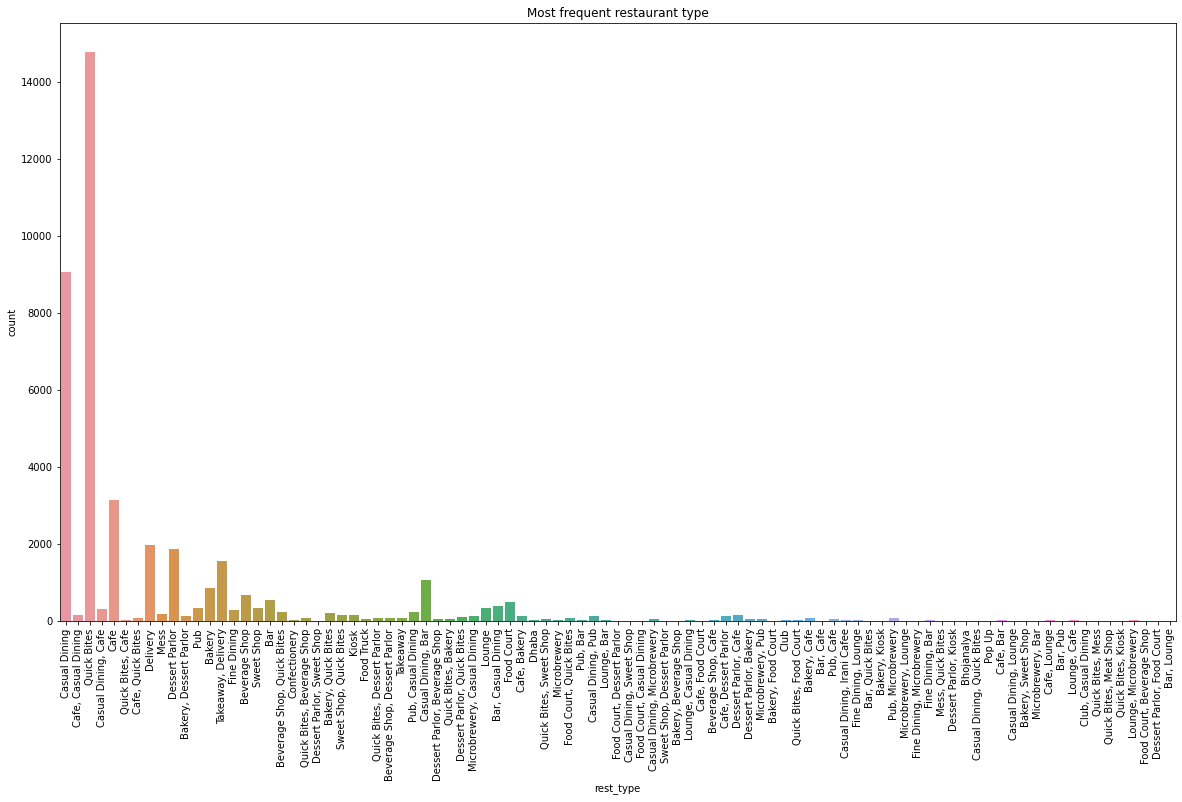

In [ ]:
plt.figure(figsize=(20,11))
plt.title('Most frequent restaurant type')
sns.countplot(zomato['rest_type']).set_xticklabels(sns.countplot(zomato['rest_type']).get_xticklabels(), rotation=90)
sns.countplot(zomato['rest_type'])

***We can see from the countplot that most frequent restaurant type is 'Quick Bites'***



---
**Restaurants allowing table booking or not**


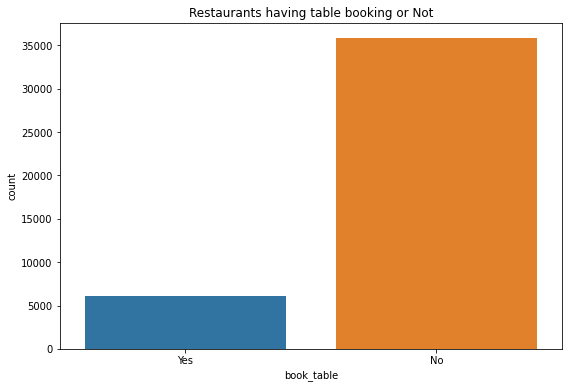

In [ ]:
plt.figure(figsize=(9,6))
plt.title('Restaurants having table booking or Not')
sns.countplot(zomato['book_table'])

***We can see that very few restaurants have table booking available***



---

**Maximum range of average cost for two people**

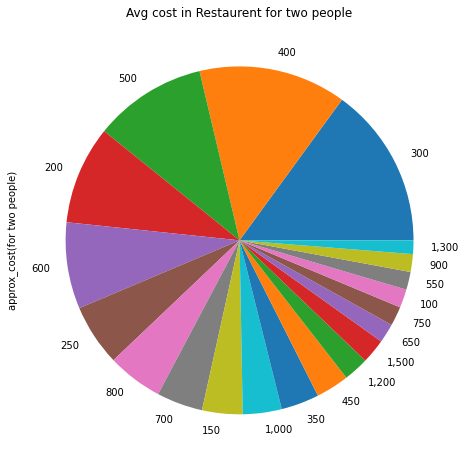

In [ ]:
plt.figure(figsize = (12,8))
zomato['approx_cost(for two people)'].value_counts()[:20].plot(kind = 'pie')
plt.title('Avg cost in Restaurent for two people')
plt.show()

***The pieplot shows that maximum range of average cost for two people is '300 Rs' ***



---

**Most frequent type of restaurant**

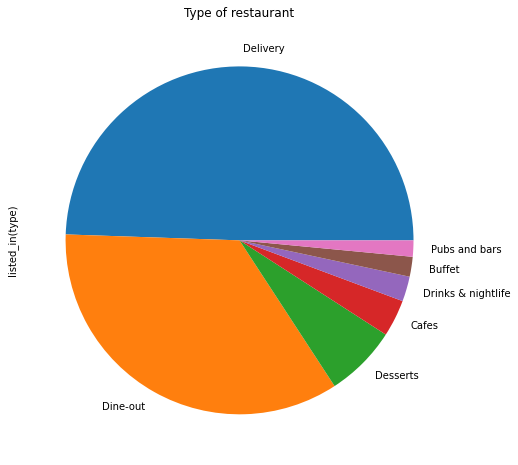

In [ ]:
plt.figure(figsize = (12,8))
zomato['listed_in(type)'].value_counts()[:20].plot(kind = 'pie')
plt.title('Type of restaurant')
plt.show()

***From the pieplot we see the most frequently listed restaurant type is 'Delivery'***



---
**Removing '/' from rating(e.g. 2.0/5) and converting rate to float type**


In [ ]:
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')

# **Making categories of ratings**

In [ ]:
bins = [-1,1,1.9,2.9,3.9,4.9]
categories = pd.cut(zomato['rate'],bins,labels=[1,2,3,4,5])
zomato['rate'] = categories

In [ ]:
zomato.rate

0        5
1        5
2        4
3        4
4        4
        ..
51712    4
51713    4
51714    4
51715    5
51716    4
Name: rate, Length: 41881, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [ ]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()                 
zomato['online_order'] = Encoder.fit_transform(zomato['online_order'])
zomato['book_table'] = Encoder.fit_transform(zomato['book_table'])
zomato['location'] = Encoder.fit_transform(zomato['location'])
zomato['rest_type'] = Encoder.fit_transform(zomato['rest_type'])
zomato['cuisines'] = Encoder.fit_transform(zomato['cuisines'])
zomato['listed_in(type)'] = Encoder.fit_transform(zomato['listed_in(type)'])


In [ ]:
zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type)
0,Jalsa,1,1,5,775,1,27,2159,800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],0
1,Spice Elephant,1,0,5,787,1,27,952,800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],0
2,San Churro Cafe,1,0,4,918,1,22,766,800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],0
3,Addhuri Udupi Bhojana,0,0,4,88,1,78,2555,300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],0
4,Grand Village,0,0,4,166,4,27,2188,600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],0


**Removing ',' from approx_cost(for two people) and convert it to numerical data**

In [ ]:
#renaming column
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost'})

In [ ]:
zomato['cost'] = zomato['cost'].astype('str')
zomato['cost'] = zomato['cost'].apply(lambda x : float(''.join([str(elem) for elem in x.split(',')])))



---



In [ ]:
zomato['reviews_list'] = zomato['reviews_list'].str.replace(',' , '')
zomato['reviews_list'] = zomato['reviews_list'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
zomato['reviews_list'].unique()

array(['"Alice \'RATED\\n \'RATED\\n \'RATED\\n \'RATED\\n \'RATED\\n \'RATED\\n \'RATED\\n \'RATED\\n \'RATED\\n \'RATED\\n \'RATED\\n \'RATED\\n (\'Rated (\'Rated (\'Rated (\'Rated (\'Rated (\'Rated (\'Rated (\'Rated (\'Rated (\'Rated (\'Rated 2.0\' 4.0\' 4.0\' 4.0\' 4.0\' 4.0\' 4.0\' 4.0\' 4.0\' 5.0\' 5.0\' 5.0\' 5/5\\nAmbience 5/5\\nService 5cars. 5cars. 5cars. : : :5/5\') :5/5\\nOverall ? ?. ?. ?? ?? ?? ?? ??????????.\\nService: ??\\nQuality A A Ala Ambience Anyways BDA. Banashankari Bhutta But Carte. Cheers!\') Chicken Christmas Clearly Clearly Clearly Coll Definitely Do Expensive Firstly Food Food Food Food Food Good Good Great Halwa I I India It It It Its Jalsa. Junoon". Me Mughal Must Never On Overdelighted Pumpkin Seating Second Service Staff The The The The The The The The The The The The The The We We We We You [(\'Rated a a a a a a a a a a a a a a a a a a about again.\') ages ala alacarteÃ\x83\\x83Ã\x82\\x83Ã\x83\\x82Ã\x82\\x82Ã\x83\\x83Ã\x82\\x82Ã\x83\\x82Ã\x82\\x92. all 



---



In [ ]:
zomato['menu_item'] = zomato['menu_item'].str.replace(',' , '')
zomato['menu_item'] = zomato['menu_item'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
zomato['menu_item'].unique()

array(['[]',
       "& & & & 'CheeseCake 'CheeseCake 'Chocolate 'Chocolate 'Chocolate 'Chocolate 'Cookie 'Gulab 'Gulab 'Gulkand 'Gulkand-E-Bahar' 'Hazelnut 'Hazelnut 'Moments' 'Oreo 'Pan 'Pan 'Pink 'Plum 'Red 'Red 'Red 'Red 'Red 'Red 'Red 'Red 'Red 'Red 'Valentine 'Valentine 'Valentines (700 (750 (750 (Pack (Pack (Pack (Pack (Pack (Pack (Pack (Pack (Pack (Pack (Pack (Pack (Pack (Pack (Pack (Pack (Pack (Pack (Pack 1)' 1)' 1)' 1)' 1)'] 10)' 2)' 2)' 2)' 2)' 2)' 2)' 2)' 2)' 2)' 2)' 5)' 5)' 500 500 500 6)' Brownie Brownie Butter Butter Cake Cake Cake Cake Cake Cake Cake Cake Cake Cake Cake Cake Cake Cake Cake Cake Cake' Cake' Cheese Cheese Chocolate Chocolate Chocolate Combo' Cream Cream Crumble Decadence Decadence Decadence Decadence Fantasy Fantasy' Frosting Frosting Gm)' Gm)' Gms)' Guava Jamun Jamun Jar Jar' Jar' ML' ML' ML' Mud Of Of Of Of Of Of Of Red Shot Slice Slice Slice Slice Slice Slice Slice Slice Vanilla Velvet Velvet Velvet Velvet Velvet Velvet Velvet Velvet Velvet Velvet Velve

In [ ]:
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
zomato['menu_item'] = Encoder.fit_transform(zomato['menu_item'])
zomato['reviews_list'] = Encoder.fit_transform(zomato['reviews_list'])

In [ ]:
zomato.tail(20)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,listed_in(type)
51697,Shizusan Shophouse & Bar,1,1,5,1313,89,28,222,1800.0,6645,9089,6
51698,Kava Kitchen & Bar - Fairfield by Marriott,0,0,4,74,89,28,2257,1200.0,19506,9089,6
51699,Harry's Bar + Cafe,1,1,5,1218,89,73,191,1200.0,1661,9089,6
51700,BAR BAR,0,1,5,1003,89,10,1153,1500.0,6078,9089,6
51701,The Beer Cafe,1,1,5,673,89,73,1417,1400.0,6803,9089,6
51702,Pablo's Gastrobar,0,0,5,1094,89,8,1392,1450.0,9636,9089,6
51703,Oliver's Pub & Diner,1,1,4,548,89,76,1393,1500.0,9601,9089,6
51704,Smaaash,0,1,5,189,89,33,2186,1500.0,14546,9089,6
51705,Izakaya Gastro Pub,1,1,4,128,89,10,2065,1200.0,17563,9089,6
51706,Red Glow,0,0,4,27,89,73,2041,1200.0,11622,9089,6


In [ ]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41881 entries, 0 to 51716
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             41881 non-null  object  
 1   online_order     41881 non-null  int64   
 2   book_table       41881 non-null  int64   
 3   rate             41881 non-null  category
 4   votes            41881 non-null  int64   
 5   location         41881 non-null  int64   
 6   rest_type        41881 non-null  int64   
 7   cuisines         41881 non-null  int64   
 8   cost             41881 non-null  float64 
 9   reviews_list     41881 non-null  int64   
 10  menu_item        41881 non-null  int64   
 11  listed_in(type)  41881 non-null  int64   
dtypes: category(1), float64(1), int64(9), object(1)
memory usage: 3.9+ MB




---



# **Splitting feature and target variables**

In [ ]:
X = zomato.drop(['name','rate'],axis =1)
y = zomato['rate']

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([3, 3, 2, ..., 2, 3, 2])

In [ ]:
X.shape

(41881, 10)

In [ ]:
y.shape

(41881,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 222)

In [ ]:
X_train.shape

(33504, 10)

In [ ]:
y_train.shape

(33504,)

# **Standardization of data**

In [ ]:
#taking numeric values
from sklearn.preprocessing import StandardScaler
num_values=zomato.select_dtypes(['float64','int64']).columns
scaler = StandardScaler()
scaler.fit(zomato[num_values])
zomato[num_values]=scaler.transform(zomato[num_values])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,listed_in(type)
0,Jalsa,0.759816,2.432675,5,0.495684,-1.317462,-0.848225,0.995941,0.492736,-0.841032,0.50683,-2.435008
1,Spice Elephant,0.759816,-0.411070,5,0.509295,-1.317462,-0.848225,-0.574782,0.492736,-0.884262,0.50683,-2.435008
2,San Churro Cafe,0.759816,-0.411070,4,0.657880,-1.317462,-1.030717,-0.816832,0.492736,-1.658539,0.50683,-2.435008
3,Addhuri Udupi Bhojana,-1.316109,-0.411070,4,-0.283542,-1.317462,1.013199,1.511273,-0.624961,-0.841628,0.50683,-2.435008
4,Grand Village,-1.316109,-0.411070,4,-0.195071,-1.206455,-0.848225,1.033680,0.045657,-1.078949,0.50683,-2.435008


# **Model 1 - Logistic Regresssion**

**Train the model**

In [ ]:
from sklearn.linear_model import LogisticRegression
my_model = LogisticRegression()
result = my_model.fit(X_train, y_train)

**Test the model**

In [ ]:
predictions = result.predict(X_test)
predictions

array([2, 2, 2, ..., 2, 2, 3])

**Performance measure of model**

In [ ]:
#checking accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8078070908439775

**Confusion matrix**

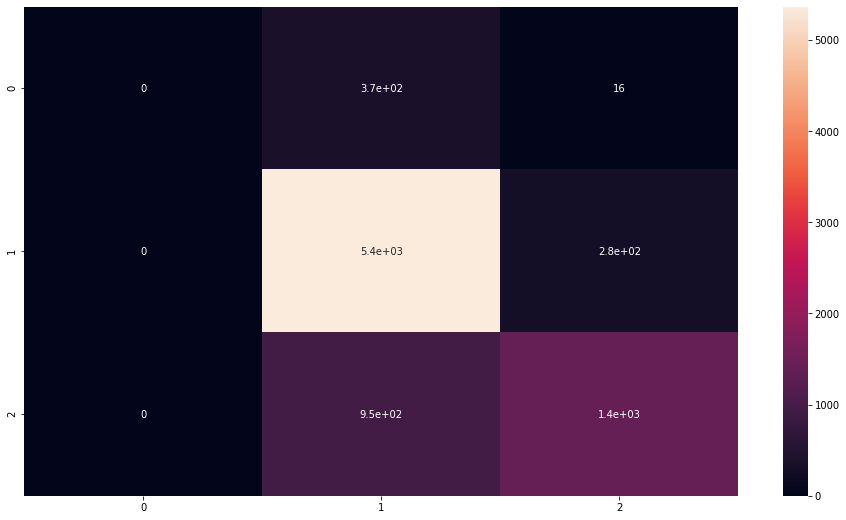

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(16,9))
sns.heatmap(cm,annot=True)

**Classification report**

In [ ]:
from sklearn import metrics
print('\n**Classification Report:\n',metrics.classification_report(y_test,predictions))


**Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       385
           2       0.80      0.95      0.87      5640
           3       0.83      0.60      0.69      2352

    accuracy                           0.81      8377
   macro avg       0.54      0.52      0.52      8377
weighted avg       0.77      0.81      0.78      8377



**Deploying the model**

In [ ]:
new_pred= list(result.predict([[1,1,454,5,24,2222,800.0,1111,4455,6]]))
print('\n**Predicted rating:\n',new_pred)


**Predicted rating:
 [0]


# **Model 2 - Decision Tree**

**Train the model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
result1 = dtc.fit(X_train,y_train)

**Test the model**

In [ ]:
predictions_dtc = result1.predict(X_test)
predictions_dtc

array([2, 1, 2, ..., 3, 2, 3])

**Performance measure of model**

In [ ]:
#checking accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions_dtc)

0.9514145875611795

**Confusion matrix**

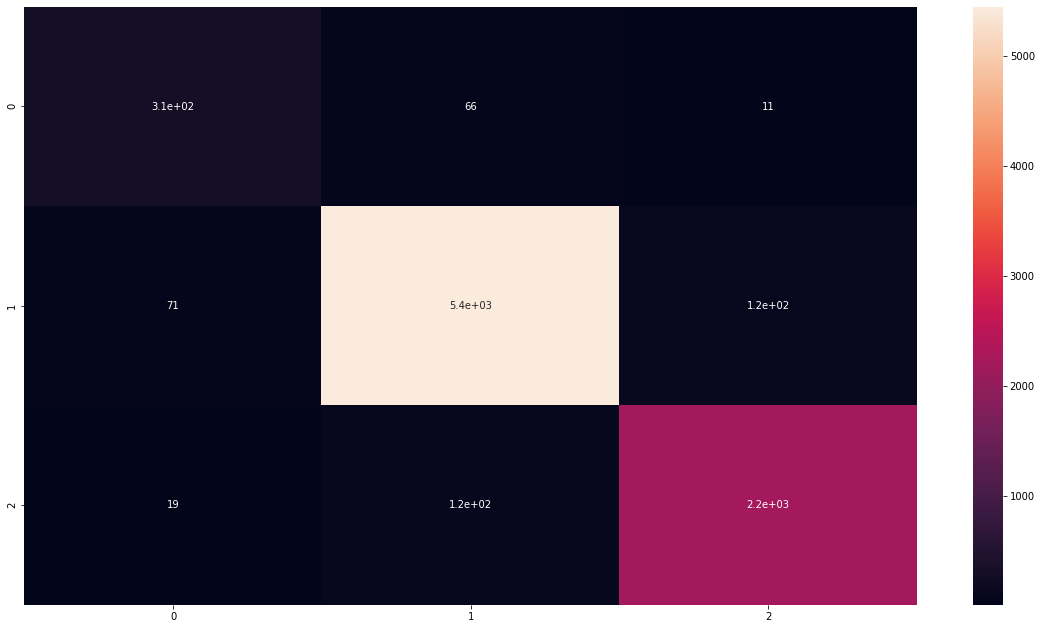

In [ ]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, predictions_dtc)
plt.figure(figsize=(20,11))
sns.heatmap(cm1,annot=True)

**Classification report**

In [ ]:
from sklearn import metrics
print('\n**Classification Report:\n',metrics.classification_report(y_test,predictions_dtc))


**Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.80      0.79       385
           2       0.97      0.97      0.97      5640
           3       0.94      0.94      0.94      2352

    accuracy                           0.95      8377
   macro avg       0.89      0.90      0.90      8377
weighted avg       0.95      0.95      0.95      8377



**Deploying the model**

In [ ]:
new_pred1= list(result1.predict([[1,1,454,5,24,2222,800.0,1111,4455,6]]))
print('\n**Predicted rating:\n',new_pred1)


**Predicted rating:
 [2]


# **Model 3- Random Forest**

**Train the model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rdc = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 33)
result2 = model_rdc.fit(X_train, y_train)

**Test the model**

In [ ]:
predictions_rdc = result2.predict(X_test)
predictions_rdc

array([2, 2, 2, ..., 3, 2, 3])

**Performance measure of model**

In [ ]:
#checking accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions_rdc)

0.9687238868329952

**Confusion matrix**

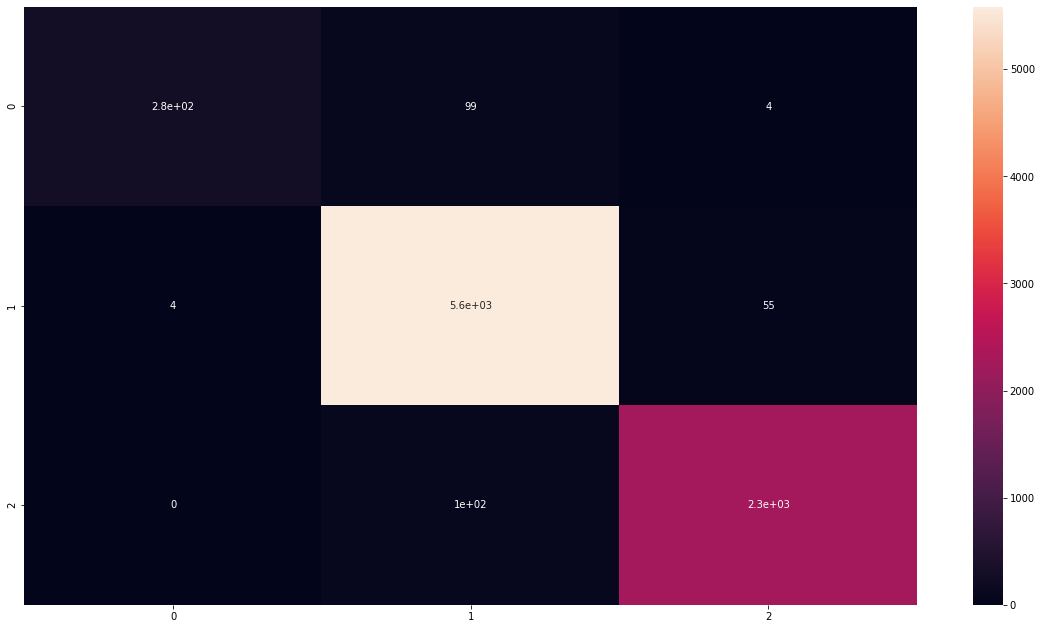

In [ ]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_test, predictions_rdc)
plt.figure(figsize=(20,11))
sns.heatmap(cm2,annot=True)

**Classification report**

In [ ]:
from sklearn import metrics
print('\n**Classification Report:\n',metrics.classification_report(y_test,predictions_rdc))


**Classification Report:
               precision    recall  f1-score   support

           1       0.99      0.73      0.84       385
           2       0.97      0.99      0.98      5640
           3       0.97      0.96      0.97      2352

    accuracy                           0.97      8377
   macro avg       0.98      0.89      0.93      8377
weighted avg       0.97      0.97      0.97      8377



**Deploying the model**

In [ ]:
new_pred2= list(result2.predict([[1,1,454,5,24,2222,800.0,1111,4455,6]]))
print('\n**Predicted rating:\n',new_pred2)


**Predicted rating:
 [3]


# **Model 4- KNN**

**Train the model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 3)
result3 = model_knn.fit(X_train,y_train)

**Test the model**

In [ ]:
predictions_knn = result3.predict(X_test)
predictions_knn

array([2, 2, 2, ..., 3, 2, 3])

**Performance measure of model**

In [ ]:
#checking accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions_knn)

0.8414706935657157

**Confusion matrix**

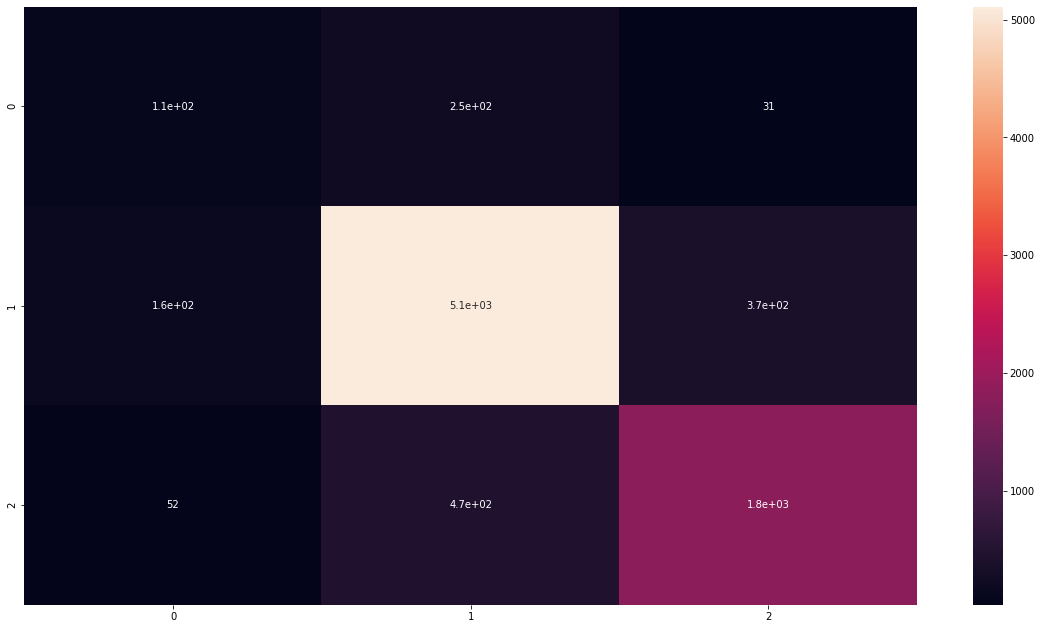

In [ ]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_test, predictions_knn)
plt.figure(figsize=(20,11))
sns.heatmap(cm3,annot=True)

**Classification report**

In [ ]:
from sklearn import metrics
print('\n**Classification Report:\n',metrics.classification_report(y_test,predictions_knn))


**Classification Report:
               precision    recall  f1-score   support

           1       0.34      0.28      0.31       385
           2       0.88      0.91      0.89      5640
           3       0.82      0.78      0.80      2352

    accuracy                           0.84      8377
   macro avg       0.68      0.66      0.67      8377
weighted avg       0.84      0.84      0.84      8377



**Deploying the model**

In [ ]:
new_pred3= list(result3.predict([[1,1,454,5,24,2222,800.0,1111,4455,6]]))
print('\n**Predicted rating:\n',new_pred3)


**Predicted rating:
 [3]


# **Model 5- SVM**

**Train the model**

In [ ]:
from sklearn.svm import SVC
model_svc = SVC(kernel = 'rbf', random_state = 33)
result4 = model_svc.fit(X_train, y_train)

**Test the model**

In [ ]:
predictions_svm = result4.predict(X_test)
predictions_svm

array([2, 2, 2, ..., 2, 2, 3])

**Performance measure of model**

In [ ]:
#checking accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions_svm)

0.8248776411603199

**Confusion matrix**

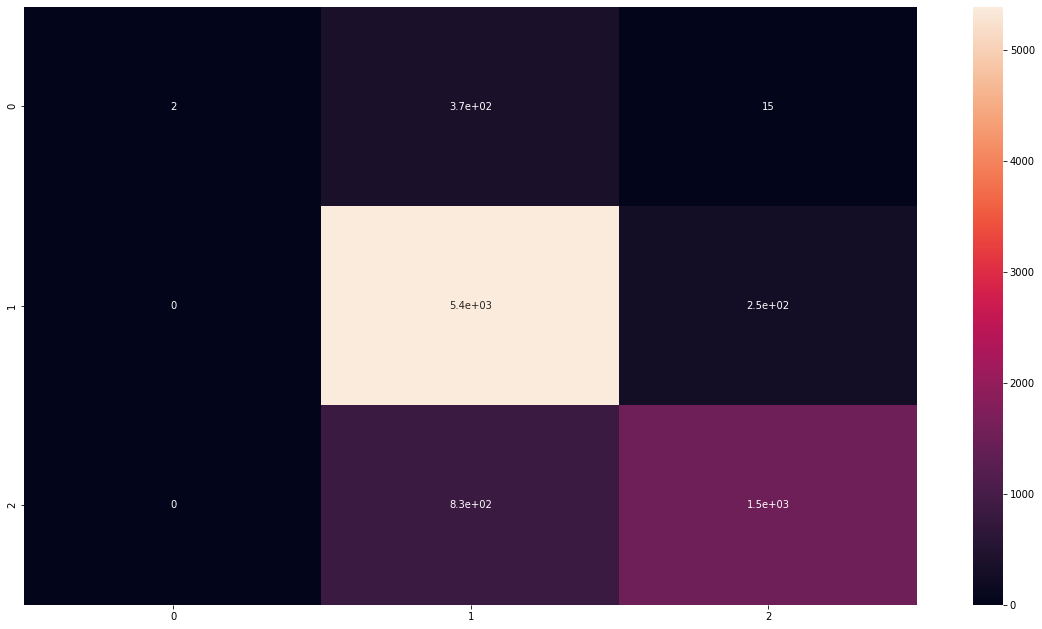

In [ ]:
from sklearn.metrics import confusion_matrix
cm4 = confusion_matrix(y_test, predictions_svm)
plt.figure(figsize=(20,11))
sns.heatmap(cm4,annot=True)

**Classification report**

In [ ]:
from sklearn import metrics
print('\n**Classification Report:\n',metrics.classification_report(y_test,predictions_svm))


**Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.01      0.01       385
           2       0.82      0.96      0.88      5640
           3       0.85      0.65      0.73      2352

    accuracy                           0.82      8377
   macro avg       0.89      0.54      0.54      8377
weighted avg       0.84      0.82      0.80      8377



**Deploying the model**

In [ ]:
new_pred4= list(result4.predict([[1,1,454,5,24,2222,800.0,1111,4455,6]]))
print('\n**Predicted rating:\n',new_pred4)


**Predicted rating:
 [3]




---



# **Conclusion**

**After training and testing all the models it is clear to conclude that 'Random Forest Classifier' algorithm gives the maximum accuracy**